In [32]:
import pandas as pd
import numpy as np
import matplotlib as nlp
import re
import nltk

In [ ]:
#read file
from google.colab import drive
drive.mount('/content/drive')
tweets  = pd.read_csv("/content/drive/MyDrive/tweets/World Cup 2022 Influencer Tweets.csv")
#display the first tweets
tweets.head()

clearing duplicates

In [34]:
tweets.drop_duplicates(subset='text',inplace=True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 987
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        987 non-null    object
 1   user_location    724 non-null    object
 2   user_created     987 non-null    object
 3   user_followers   987 non-null    int64 
 4   user_favourites  987 non-null    int64 
 5   user_verified    987 non-null    bool  
 6   date             987 non-null    object
 7   text             987 non-null    object
 8   source           987 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 70.4+ KB


deep cleaning

In [35]:
#replace all NaN values wit an empty string
tweets = tweets.replace(np.nan, '')
tweets.shape
# function for twitter text cleaning
def tweet_cleaner(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    # remove whitespaces
    text = ' '.join(text.split())
    return text
#Apply text cleaning function to text column in tweets dataframe
tweets['text'] = tweets['text'].apply(lambda x:tweet_cleaner(x))
tweets.shape

(987, 9)

In [36]:
tweets = tweets.sample(frac=1)
tweets = tweets[:200000]
print("Dataset shape:", tweets.shape)

Dataset shape: (987, 9)


In [37]:
#downloading the vader lexicon from nltk
!pip install vaderSentiment
!pip install twython
nltk.download('vader_lexicon')#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
tweets['scores'] = tweets['text'].apply(lambda text: sid.polarity_scores(text))
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores
902,Mzilikazi wa Afrika,"Bushbuckridge, Mpumalanga",2011-02-09 12:03:52+00:00,522132,3809,True,2022-11-28 16:56:16+00:00,ANOTHER ONE: More players behaving badly and a...,Twitter for iPhone,"{'neg': 0.154, 'neu': 0.732, 'pos': 0.114, 'co..."
91,عبدالله بن حمد العذبة,"Doha, Qatar",2009-06-21 07:14:21+00:00,826225,357,True,2022-12-23 17:41:50+00:00,New mural of Lionel Messi in Buenos Aires with...,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp..."
939,Gulf News,United Arab Emirates,2009-02-11 08:21:32+00:00,1460695,1009,True,2022-11-21 08:00:02+00:00,#FIFAWorldCup #Qatar 2022: With #BenzemaOut #G...,TweetDeck,"{'neg': 0.1, 'neu': 0.836, 'pos': 0.064, 'comp..."
655,Demba Ba,,2009-08-09 10:36:19+00:00,1350809,3661,True,2022-12-09 22:29:34+00:00,One simple rule in the penalty shootout... YOU...,Twitter for Android,"{'neg': 0.283, 'neu': 0.5, 'pos': 0.217, 'comp..."
82,The Telegraph,"Kolkata, India",2010-05-07 04:10:03+00:00,317799,272,True,2022-12-23 12:55:43+00:00,He was also photographed holding the World Cup...,TweetDeck,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [39]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.05:
      return "Positive"
    elif sentiment['compound'] <= -0.05: 
      return "Negative"
    else:
      return "Neutral"
final_df = tweets
tweets['sentiment'] = final_df['scores'].apply(lambda x: sentimentPredict(x))
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
902,Mzilikazi wa Afrika,"Bushbuckridge, Mpumalanga",2011-02-09 12:03:52+00:00,522132,3809,True,2022-11-28 16:56:16+00:00,ANOTHER ONE: More players behaving badly and a...,Twitter for iPhone,"{'neg': 0.154, 'neu': 0.732, 'pos': 0.114, 'co...",Negative
91,عبدالله بن حمد العذبة,"Doha, Qatar",2009-06-21 07:14:21+00:00,826225,357,True,2022-12-23 17:41:50+00:00,New mural of Lionel Messi in Buenos Aires with...,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",Positive
939,Gulf News,United Arab Emirates,2009-02-11 08:21:32+00:00,1460695,1009,True,2022-11-21 08:00:02+00:00,#FIFAWorldCup #Qatar 2022: With #BenzemaOut #G...,TweetDeck,"{'neg': 0.1, 'neu': 0.836, 'pos': 0.064, 'comp...",Negative
655,Demba Ba,,2009-08-09 10:36:19+00:00,1350809,3661,True,2022-12-09 22:29:34+00:00,One simple rule in the penalty shootout... YOU...,Twitter for Android,"{'neg': 0.283, 'neu': 0.5, 'pos': 0.217, 'comp...",Negative
82,The Telegraph,"Kolkata, India",2010-05-07 04:10:03+00:00,317799,272,True,2022-12-23 12:55:43+00:00,He was also photographed holding the World Cup...,TweetDeck,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


In [40]:
tweets = tweets.replace(['Positive','Neutral','Negative'],[2, 1, 0])

In [41]:
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
902,Mzilikazi wa Afrika,"Bushbuckridge, Mpumalanga",2011-02-09 12:03:52+00:00,522132,3809,True,2022-11-28 16:56:16+00:00,ANOTHER ONE: More players behaving badly and a...,Twitter for iPhone,"{'neg': 0.154, 'neu': 0.732, 'pos': 0.114, 'co...",0
91,عبدالله بن حمد العذبة,"Doha, Qatar",2009-06-21 07:14:21+00:00,826225,357,True,2022-12-23 17:41:50+00:00,New mural of Lionel Messi in Buenos Aires with...,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",2
939,Gulf News,United Arab Emirates,2009-02-11 08:21:32+00:00,1460695,1009,True,2022-11-21 08:00:02+00:00,#FIFAWorldCup #Qatar 2022: With #BenzemaOut #G...,TweetDeck,"{'neg': 0.1, 'neu': 0.836, 'pos': 0.064, 'comp...",0
655,Demba Ba,,2009-08-09 10:36:19+00:00,1350809,3661,True,2022-12-09 22:29:34+00:00,One simple rule in the penalty shootout... YOU...,Twitter for Android,"{'neg': 0.283, 'neu': 0.5, 'pos': 0.217, 'comp...",0
82,The Telegraph,"Kolkata, India",2010-05-07 04:10:03+00:00,317799,272,True,2022-12-23 12:55:43+00:00,He was also photographed holding the World Cup...,TweetDeck,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1


In [42]:
tweets.drop(['user_name','user_location','user_created','user_followers','user_favourites','user_verified','date','source','scores'], axis=1, inplace=True)

In [43]:
tweets['text'] = tweets['text'].astype('str')


Check the number of positive vs. negative tagged sentences

In [44]:
positives = tweets['sentiment'][tweets.sentiment == 2 ]
negatives = tweets['sentiment'][tweets.sentiment == 0 ]

print('Total length of the data is:         {}'.format(tweets.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         987
No. of positve tagged sentences is:  462
No. of negative tagged sentences is: 129


In [45]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
#removing shortwords
tweets['text']=tweets['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
tweets.head(5)

,text,sentiment
902,ANOTHER ONE: More players behaving badly actin...,0
91,mural Lionel Messi Buenos Aires with Qatari Ar...,2
939,#FIFAWorldCup #Qatar 2022: With #BenzemaOut #G...,0
655,simple rule penalty shootout... YOUR BEST PENA...,0
82,also photographed holding World trophy. Accord...,1


In [47]:
from sklearn.utils import shuffle
tweets =  shuffle(tweets).reset_index(drop=True)

In [48]:
tokenized_tweet=tweets['text'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0    [𝑳𝒊𝒐𝒏𝒆𝒍, 𝑴𝒆𝒔𝒔𝒊, 1⃣0⃣0⃣0⃣, 7⃣8⃣9⃣, #UCL, #TeamP...
1    [#BreakingNews, Argentina, beat, Croatia, reac...
2    [front, more, than, 5,400, friends, colleagues...
3    [Qatar, Worldcup, 2022:, Match, results, today...
4    [France, Morocco, #AtlasLions's, Ounahi, letha...
Name: text, dtype: object

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweets['text'].values.astype('U'))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Train/Test Split¶


In [50]:
from sklearn.model_selection import train_test_split
X=text_counts
y=tweets['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)


Naive Bayes

In [51]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.57575758 0.63131313 0.62436548 0.5786802  0.5786802 ]
Train accuracy =94.55%
Test accuracy =58.59%


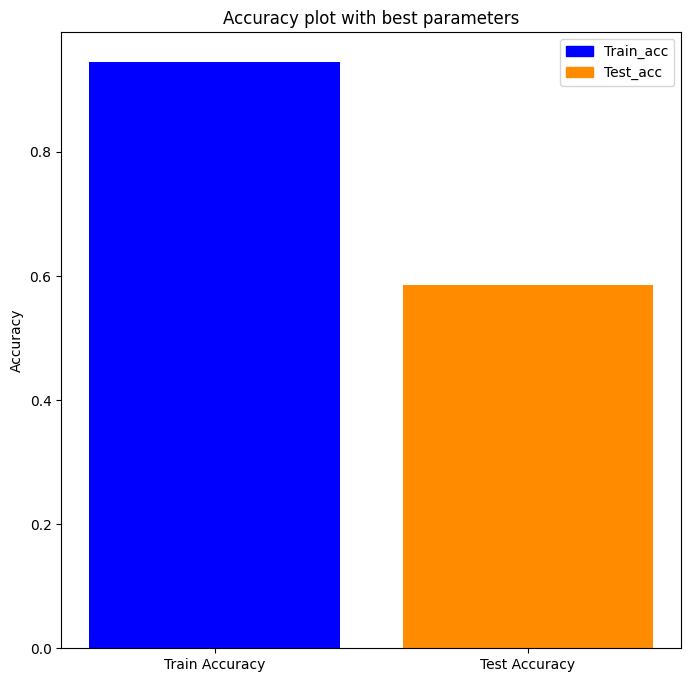

In [52]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_cnb = [train_acc_cnb,test_acc_cnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()


Confusion Matrix

In [53]:
from sklearn.metrics import *
#Predict test data set
y_pred_cnb =cnb.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_cnb))

[[14  6  6]
 [11 38 22]
 [22 15 64]]


In [54]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_cnb))

              precision    recall  f1-score   support

           0       0.30      0.54      0.38        26
           1       0.64      0.54      0.58        71
           2       0.70      0.63      0.66       101

    accuracy                           0.59       198
   macro avg       0.55      0.57      0.54       198
weighted avg       0.62      0.59      0.60       198




Calculating F1, prescision and recall scores

In [55]:
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro")*100))
precision_cnb=precision_score(y_test, y_pred_cnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_cnb, average="macro")*100))  
recall_cnb=recall_score(y_test, y_pred_cnb, average="macro")

F1 score =54.38%
Precision score =54.59%
Recall score =56.91%
